## Mã hóa hướng dẫn có mục tiêu

Trong các bài giảng trước của phần này, chúng ta đã học cách chuyển đổi nhãn thành một số bằng mã hóa one-hot, thay thế bằng một chữ số, thay thế bằng tần suất hoặc số lượng quan sát. Các phương pháp này rất đơn giản, hầu như không có giả định và nhìn chung hoạt động tốt trong các tình huống khác nhau.

Tuy nhiên, cũng có những phương pháp cho phép chúng ta nắm bắt thông tin trong khi tiền xử lý nhãn của các biến hạng mục. Các phương pháp đó gồm:

- Sắp xếp các nhãn theo mục tiêu.
- Thay thế các nhãn bằng giá trị trung bình mục tiêu (mã hóa trung bình/mã hóa mục tiêu).
- Thay thế các nhãn theo tỷ lệ xác suất của mục tiêu là 1 hoặc 0.
- Trọng số bằng chứng.

Tất cả các phương pháp trên đều có điểm chung là:

- Mã hóa được **hướng dẫn bởi mục tiêu** và
- Tạo ra **mối quan hệ đơn điệu** giữa biến và mục tiêu.


### Tính đơn điệu

Mối quan hệ đơn điệu là mối quan hệ thực hiện một trong những điều sau:


- (1) khi giá trị của một biến tăng lên thì giá trị của biến kia cũng vậy; hoặc
- (2) khi giá trị của một biến tăng, giá trị của biến kia lại giảm.

Trong trường hợp này, khi giá trị của biến độc lập (yếu tố dự báo) tăng lên, thì mục tiêu cũng vậy; hoặc ngược lại, khi giá trị của biến tăng lên thì giá trị mục tiêu lại giảm.



### Ưu điểm của mã hóa hướng dẫn có mục tiêu

- Nắm bắt thông tin trong hạng mục nên tạo ra nhiều đặc trưng dự đoán hơn.
- Tạo mối quan hệ đơn điệu giữa biến và mục tiêu để phù hợp với mô hình tuyến tính.
- Không mở rộng không gian đặc trưng.


### Hạn chế

- Dễ dẫn tới overfitting.
- Khó kiểm định chéo với các thư viện hiện tại.


### Lưu ý

Các phương pháp được thảo luận trong bài này và 3 bài giảng sắp tới cũng có thể sử dụng với các biến dạng số sau khi thực hiện rời rạc hóa. Điều này tạo ra mối quan hệ đơn điệu giữa biến dạng số và mục tiêu, do đó cải thiện chất lượng của mô hình tuyến tính.

===============================================================================

## Mã hóa số nguyên được sắp xếp

Sắp xếp các hạng mục theo mục tiêu là gán một số cho hạng mục từ 1 đến k, trong đó k là số hạng mục riêng biệt trong biến, nhưng việc đánh số này được báo bằng giá trị trung bình của mục tiêu cho từng hạng mục.

Ví dụ, chúng ta có biến city với các giá trị London, Manchester và Bristol; nếu tỷ lệ mặc định là 30% ở London, 20% ở Bristol và 10% ở Manchester thì chúng ta thay London bằng 1, Bristol bằng 2 và Manchester bằng 3.
 
## Trong bản mô phỏng này:

Chúng ta sẽ thực hiện mã hóa với:
- pandas
- Feature-Engine

Chúng ta sẽ sử dụng tập dữ liệu giá nhà để minh họa các ưu điểm và hạn chế của từng triển khai.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# chia tập dữ liệu
from sklearn.model_selection import train_test_split

# mã hóa với feature-engine
from feature_engine.encoding import OrdinalEncoder

In [2]:
# load tập dữ liệu

data = pd.read_csv(
    './datatset/house-price/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [3]:
# xem từng biến có bao nhiêu nhãn

for col in data.columns:
    print(col, ': ', len(data[col].unique()), ' labels')

Neighborhood :  25  labels
Exterior1st :  15  labels
Exterior2nd :  16  labels
SalePrice :  663  labels


In [4]:
# khám phá các hạng mục duy nhất
data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [5]:
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [6]:
data['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

### Mã hóa quan trọng

Chúng ta lựa chọn số để chỉ định cho từng hạng mục sử dụng tập huấn luyện, rồi sử dụng các mapping đó trong tập kiểm tra.

**Lưu ý: để thực hiến kỹ thuật này với pandas, chúng ta cần giữ mục tiêu trong tập huấn luyện.**

In [24]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']],  # lần này giữ mục tiêu!!
    data['SalePrice'],  # mục tiêu
    test_size=0.3,  # phần trăm các quan sát trong tập kiểm tra
    random_state=0)  # seed đảm bảo khả năng tái lặp

X_train.shape, X_test.shape

((1022, 4), (438, 4))

### Khám phá mối quan hệ ban đầu giữa biến hạng mục với mục tiêu

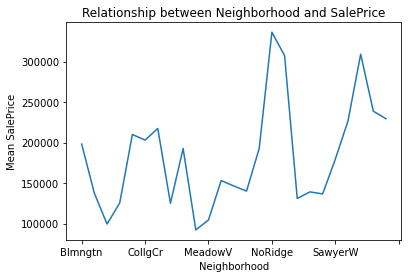

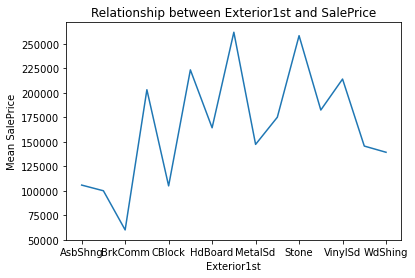

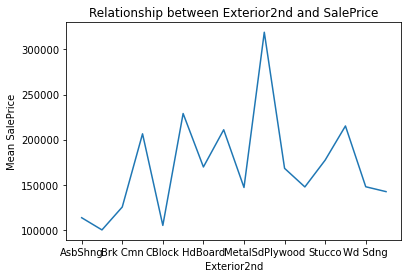

In [25]:
# khám phá mối quan hệ của các hạng mục với mục tiêu

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

Chúng ta thấy mối quan hệ giữa mục tiêu và các hạng mục của các biến phân loại tăng và giảm phụ thuộc vào hạng mục.


## Mã hóa số nguyên đã sắp xếp với pandas


### Ưu điểm

- nhanh
- trả về pandas dataframe

### Hạn chế của pandas:

- Nó không bảo toàn thông tin từ dữ liệu huấn luyện để truyền sang dữ liệu kiểm tra.

Chúng ta cần lưu trữ riêng các bản đồ mã hóa nếu định sử dụng chúng trong sản xuất. 

In [26]:
## Yêu cầu 1: sắp xếp các nhãn theo giá trị mục tiêu trung bình

## VIẾT CODE Ở ĐÂY:
X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values(ascending = False)

Neighborhood
NoRidge    336264.666667
StoneBr    309105.937500
NridgHt    307418.137255
Timber     238700.100000
Veenker    229500.000000
Somerst    226644.196429
Crawfor    217453.914286
ClearCr    210034.666667
CollgCr    203086.371429
Blmngtn    198164.500000
NWAmes     192788.235294
Gilbert    192662.290909
SawyerW    179463.088889
Mitchel    153070.444444
NAmes      146435.264901
NPkVill    140107.142857
SWISU      139154.666667
Blueste    137500.000000
Sawyer     136596.442623
OldTown    130958.328767
BrkSide    125438.414634
Edwards    125082.676056
MeadowV    104441.666667
BrDale      99440.000000
IDOTRR      92174.166667
Name: SalePrice, dtype: float64

<details><summary> Gợi ý </summary>

[groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

[mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

</details>

Trong cell trên, chúng ta đã sắp xếp các hạng mục từ neighbourhood có giá bán nhà rẻ hơn (IDOTRR) đến neighbourhood có giá nhà trung bình, đắt hơn (NoRidge).

Trong các cell tiếp theo, chúng ta sẽ thay thế các hạng mục đó, sắp xếp như cũ, bằng các số từ 0 đến k, trong đó k là số hạng mục khác nhau trừ đi 1, trong trường hợp này là 25 - 1 = 24.

Vậy IDOTRR sẽ được thay thế bằng 0 và NoRidge được thay bằng 24. 

In [27]:
## Yêu cầu 2: trước tiên tạo một list đã sắp xếp với các nhãn

## VIẾT CODE Ở ĐÂY:
ordered_labels = X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values().index

ordered_labels

Index(['IDOTRR', 'BrDale', 'MeadowV', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Somerst', 'Veenker', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [28]:
## Yêu cầu 3: tiếp theo, tạo một dictionary với các mapping của các hạng mục tới số

## VIẾT CODE Ở ĐÂY:
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'IDOTRR': 0,
 'BrDale': 1,
 'MeadowV': 2,
 'Edwards': 3,
 'BrkSide': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'Gilbert': 13,
 'NWAmes': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'ClearCr': 17,
 'Crawfor': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

<details><summary> Gợi ý </summary>


```
enumerate()
```


</details>

In [29]:
## Yêu cầu 4: thay thế các nhãn với các số nguyên

## VIẾT CODE Ở ĐÂY:
X_train['Neighborhood'] = X_train['Neighborhood'].map(ordinal_mapping)
X_test['Neighborhood'] = X_test['Neighborhood'].map(ordinal_mapping)

In [30]:
# khám phá kết quả

X_train['Neighborhood'].head(10)

64      16
682     17
960      4
1384     3
1100     8
416      6
1034    18
853     10
472      3
1011     3
Name: Neighborhood, dtype: int64

In [31]:
## Yêu cầu 5: biến các lệnh trước đó thành 2 hàm


def find_category_mappings(df, variable, target):

    # trước tiên tạo một list đã sắp xếp với các nhãn
    ## VIẾT CODE Ở ĐÂY:
    ordered_labels = df.groupby([variable
                                 ])[target].mean().sort_values().index

    # trả về dictionary với các mapping
    ## VIẾT CODE Ở ĐÂY:
    return {k: i for i, k in enumerate(ordered_labels, 0)}


def integer_encode(train, test, variable, ordinal_mapping):

    ## VIẾT CODE Ở ĐÂY:
    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [32]:
## Yêu cầu 6: chạy một vòng lặp qua các biến hạng mục còn lại

for variable in ['Exterior1st', 'Exterior2nd']:

    ## VIẾT CODE Ở ĐÂY:
    mappings = find_category_mappings(X_train,variable, 'SalePrice')

    ## VIẾT CODE Ở ĐÂY:
    integer_encode(X_train, X_test,variable,mappings)

In [33]:
# hãy xem kết quả

X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,16,11,13,219500
682,17,5,7,173000
960,4,5,8,116500
1384,3,4,4,105000
1100,8,5,7,60000


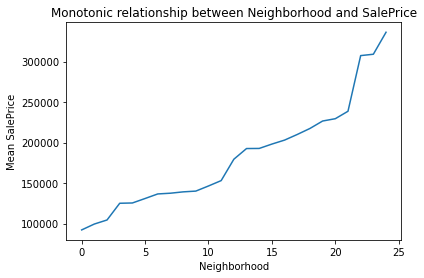

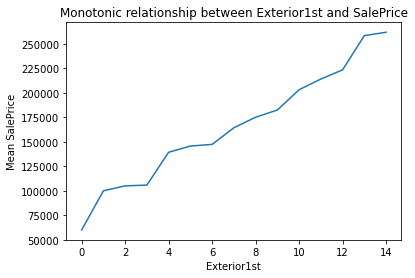

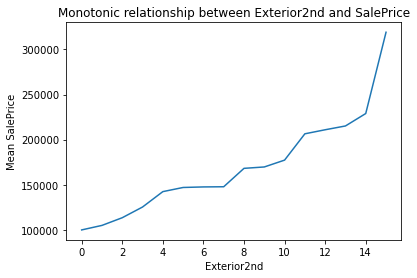

In [34]:
# kiểm tra mối quan hệ đơn điệu mới tạo
# giữa các biến và mục tiêu

for var in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    
    fig = plt.figure()
    fig = X_train.groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Monotonic relationship between {} and SalePrice'.format(var))
    fig.set_ylabel('Mean SalePrice')
    plt.show()

Từ các biểu đồ trên, chúng ta thấy mối quan hệ đơn điệu giữa các hạng mục và mục tiêu, và với 2 biến đầu tiên thì gần như tuyến tính, giúp cải thiện hiệu suất của mô hình tuyến tính.

### Lưu ý

Đơn điệu không có nghĩa là hoàn toàn tuyến tính. Đơn điệu có nghĩa là tăng hoặc giảm liên tục.

Việc thay thế các nhãn hạng mục với phương pháp và code này sẽ tạo ra các giá trị bị khuyết cho các hạng mục có trong tập kiểm tra mà không thấy trong tập huấn luyện. Do đó, việc xử lý nhãn hiếm trước khi thực hiện vô cùng quan trọng. Chúng ta sẽ giải thích cách làm điều này trong notebook sau. 

## Mã hóa số nguyên với Feature-Engine 

Chúng ta sẽ không giữ được biến mục tiêu trong tập huấn luyện nếu sử dụng Feature-Engine thay vì pandas.

In [35]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # các yếu tố dự báo
    data['SalePrice'],  # mục tiêu
    test_size=0.3,  # phần trăm các quan sát trong tập kiểm tra
    random_state=0)  # seed đảm bảo khả năng tái lặp

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [36]:
ordinal_enc = OrdinalEncoder(
    # LƯU Ý rằng chúng ta chỉ ra ordered trong encoding_method, nếu không thì nó sẽ gán số bất kỳ 
    encoding_method='ordered',
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [37]:
# khi khớp transformer, chúng ta cũng cần truyền mục tiêu 
# giống như bất kì class dự báo nào của Scikit-learn

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

In [38]:
# trong dict encoder, chúng ta có thể quán sát từng hạng mục hàng đầu 
# được chọn cho từng biến

ordinal_enc.encoder_dict_

{'Neighborhood': {'IDOTRR': 0,
  'BrDale': 1,
  'MeadowV': 2,
  'Edwards': 3,
  'BrkSide': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'Blueste': 7,
  'SWISU': 8,
  'NPkVill': 9,
  'NAmes': 10,
  'Mitchel': 11,
  'SawyerW': 12,
  'Gilbert': 13,
  'NWAmes': 14,
  'Blmngtn': 15,
  'CollgCr': 16,
  'ClearCr': 17,
  'Crawfor': 18,
  'Somerst': 19,
  'Veenker': 20,
  'Timber': 21,
  'NridgHt': 22,
  'StoneBr': 23,
  'NoRidge': 24},
 'Exterior1st': {'BrkComm': 0,
  'AsphShn': 1,
  'CBlock': 2,
  'AsbShng': 3,
  'WdShing': 4,
  'Wd Sdng': 5,
  'MetalSd': 6,
  'HdBoard': 7,
  'Plywood': 8,
  'Stucco': 9,
  'BrkFace': 10,
  'VinylSd': 11,
  'CemntBd': 12,
  'Stone': 13,
  'ImStucc': 14},
 'Exterior2nd': {'AsphShn': 0,
  'CBlock': 1,
  'AsbShng': 2,
  'Brk Cmn': 3,
  'Wd Shng': 4,
  'MetalSd': 5,
  'Stone': 6,
  'Wd Sdng': 7,
  'Plywood': 8,
  'HdBoard': 9,
  'Stucco': 10,
  'BrkFace': 11,
  'ImStucc': 12,
  'VinylSd': 13,
  'CmentBd': 14,
  'Other': 15}}

In [39]:
# đây là list các biến mà encoder sẽ biến đổi

ordinal_enc.variables_

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [40]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# khám phá kết quả
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,16,11,13
682,17,5,7
960,4,5,8
1384,3,4,4
1100,8,5,7


**Lưu ý**

Nếu các biến đối số được để thành None thì encoder sẽ tự động xác định tất cả các biến hạng mục. Tuyệt đúng không?

Encoder sẽ không mã hóa các biến dạng số. Vì vậy, nếu một số biến dạng số là biến hạng mục thì chúng ta sẽ cần ép kiểu lại chúng thành object trước khi sử dụng encoder. 

Cuối cùng, nếu có một nhãn trong tập kiểm tra mà không xuất hiện trong tập huấn luyện thì encoder sẽ thông qua và báo lỗi để cảnh báo về động thái này.